# MUSIC TO STOCK EXPLORATORY DATA ANALSYIS

Using the **VIX Stock** and **Spotify Top Hits Data** this EDA seeks to analyse a possible correlation between Muisc listening Trends and Stock Market Interactions.

### Can Music on Spotify Shed light on Stock Market Returns?

**Hypothesis**: The type of music people listen to at any given moment is a reflection of their mood and influences how they choose to use their money

A key assumption had to be made for this EDA to have a firm logical ground

**Assumption**: People listen to music that reflects the mood they are currently experienceing, rather than listening to music to change their mood.

In [5]:
# imports
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### STOCKS
Loading and cleaning the VixStockIndex csv file

In [6]:
# loading stock data
vix_stock_data = pd.read_csv('VixStockIndex.csv')
vix_stock_data['Date'] = pd.to_datetime(vix_stock_data['Date'], format='%Y/%m/%d')
vix_stock_data['Date'] = pd.to_datetime(vix_stock_data['Date'])
vix_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,10.95,11.07,9.52,9.77,9.77,0
1,2018-01-03,9.56,9.65,8.94,9.15,9.15,0
2,2018-01-04,9.01,9.31,8.92,9.22,9.22,0
3,2018-01-05,9.10,9.54,9.00,9.22,9.22,0
4,2018-01-08,9.61,9.89,9.32,9.52,9.52,0


In [7]:
vix_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       502 non-null    datetime64[ns]
 1   Open       502 non-null    float64       
 2   High       502 non-null    float64       
 3   Low        502 non-null    float64       
 4   Close      502 non-null    float64       
 5   Adj Close  502 non-null    float64       
 6   Volume     502 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.6 KB


In [8]:
# splitting up the 'date' column into 'Day', 'Month', and 'Year'
vix_stock_data['Month'] = pd.DatetimeIndex(vix_stock_data['Date']).month
vix_stock_data['Day'] = pd.DatetimeIndex(vix_stock_data['Date']).day
vix_stock_data['Year'] = pd.DatetimeIndex(vix_stock_data['Date']).year
vix_stock_data = vix_stock_data.loc[vix_stock_data['Year'].isin([2018, 2019])]
vix_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Day,Year
0,2018-01-02,10.95,11.07,9.52,9.77,9.77,0,1,2,2018
1,2018-01-03,9.56,9.65,8.94,9.15,9.15,0,1,3,2018
2,2018-01-04,9.01,9.31,8.92,9.22,9.22,0,1,4,2018
3,2018-01-05,9.10,9.54,9.00,9.22,9.22,0,1,5,2018
4,2018-01-08,9.61,9.89,9.32,9.52,9.52,0,1,8,2018


In [9]:
# getting dimensions
print(vix_stock_data.shape)

(502, 10)


In [10]:
# cleaning data and retaining colums we need for analysis : 'Month','Day','Year' and 'Close' (closing price)
vix_stock_data_clean = vix_stock_data.loc[:, ['Month','Day','Year','Close']]
vix_stock_data_clean.head()

,Month,Day,Year,Close
0,1,2,2018,9.77
1,1,3,2018,9.15
2,1,4,2018,9.22
3,1,5,2018,9.22
4,1,8,2018,9.52


### SPOTIFY 
Loading and cleaning the 'clean_music_file'

In [11]:
# Load Spotify top charts data
spotify_data = pd.read_csv('clean_music_file.csv')
spotify_data['date'] = pd.to_datetime(spotify_data['date'], format='%d/%m/%Y')
spotify_data.reset_index()

spotify_data.head()

,date,position,track,title,artist,Country,Uri,Album/Single,Genre,Artist_followers,...,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive
0,2020-11-05,1.0,"positions , Ariana Grande",positions,Ariana Grande,USA,https://open.spotify.com/track/35mvY5S1H3J2QZy...,album,dance pop,52571724.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2020-11-05,2.0,"Lemonade , Internet Money",Lemonade,Internet Money,USA,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,album,pop rap,159542.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2020-11-05,3.0,"34+35 , Ariana Grande",34+35,Ariana Grande,USA,https://open.spotify.com/track/6Im9k8u9iIzKMrm...,album,dance pop,52571724.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2020-11-05,4.0,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez",USA,https://open.spotify.com/track/47EiUVwUp4C9fGc...,single,latin,26265604.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2020-11-05,5.0,"Mood , 24kGoldn",Mood,24kGoldn,USA,https://open.spotify.com/track/3tjFYV6RSFtuktY...,single,cali rap,490873.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
spotify_data = spotify_data[['date', 'position', 'title', 'Genre', 'Explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
                     'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo', 'anger',
                     'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust', 'negative',
                     'positive']]
spotify_data.head()

,date,position,title,Genre,Explicit,danceability,energy,key,loudness,mode,...,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
0,2020-11-05,1.0,positions,dance pop,True,0.737,0.802,0.0,-4.771,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-05,2.0,Lemonade,pop rap,True,0.800,0.658,1.0,-6.142,0.0,...,2.0,5.0,1.0,0.0,7.0,1.0,3.0,5.0,1.0,7.0
2,2020-11-05,3.0,34+35,dance pop,True,0.830,0.585,0.0,-6.476,1.0,...,3.0,3.0,2.0,2.0,3.0,3.0,3.0,4.0,6.0,5.0
3,2020-11-05,4.0,Dakiti,latin,True,0.731,0.573,4.0,-10.059,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-05,5.0,Mood,cali rap,True,0.700,0.722,7.0,-3.558,0.0,...,5.0,2.0,1.0,4.0,3.0,2.0,1.0,3.0,7.0,4.0


In [13]:
# splitting up the 'date' column into 'Day', 'Month', and 'Year'
spotify_data['Month'] = pd.DatetimeIndex(spotify_data['date']).month
spotify_data['Day'] = pd.DatetimeIndex(spotify_data['date']).day
spotify_data['Year'] = pd.DatetimeIndex(spotify_data['date']).year
spotify_data.head()

,date,position,title,Genre,Explicit,danceability,energy,key,loudness,mode,...,fear,joy,sadness,surprise,trust,negative,positive,Month,Day,Year
0,2020-11-05,1.0,positions,dance pop,True,0.737,0.802,0.0,-4.771,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5,2020
1,2020-11-05,2.0,Lemonade,pop rap,True,0.800,0.658,1.0,-6.142,0.0,...,0.0,7.0,1.0,3.0,5.0,1.0,7.0,11,5,2020
2,2020-11-05,3.0,34+35,dance pop,True,0.830,0.585,0.0,-6.476,1.0,...,2.0,3.0,3.0,3.0,4.0,6.0,5.0,11,5,2020
3,2020-11-05,4.0,Dakiti,latin,True,0.731,0.573,4.0,-10.059,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,5,2020
4,2020-11-05,5.0,Mood,cali rap,True,0.700,0.722,7.0,-3.558,0.0,...,4.0,3.0,2.0,1.0,3.0,7.0,4.0,11,5,2020


In [14]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280184 entries, 0 to 280183
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              280184 non-null  datetime64[ns]
 1   position          280184 non-null  float64       
 2   title             280184 non-null  object        
 3   Genre             270108 non-null  object        
 4   Explicit          270108 non-null  object        
 5   danceability      270108 non-null  float64       
 6   energy            270108 non-null  float64       
 7   key               270108 non-null  float64       
 8   loudness          270108 non-null  float64       
 9   mode              270108 non-null  float64       
 10  speechiness       270108 non-null  float64       
 11  acoustics         270108 non-null  float64       
 12  instrumentalness  270108 non-null  float64       
 13  liveliness        270108 non-null  float64       
 14  vale

In [15]:
# cleaning data and retaining colums we need for analysis
spotify_data_final = spotify_data[['title', 'Month', 'Day', 'Year', 'tempo', 'valence', 'key', 'danceability',
                                 'energy']]
spotify_data_final.head()

,title,Month,Day,Year,tempo,valence,key,danceability,energy
0,positions,11,5,2020,144.015,0.682,0.0,0.737,0.802
1,Lemonade,11,5,2020,140.042,0.462,1.0,0.800,0.658
2,34+35,11,5,2020,109.978,0.485,0.0,0.830,0.585
3,Dakiti,11,5,2020,109.928,0.145,4.0,0.731,0.573
4,Mood,11,5,2020,90.989,0.756,7.0,0.700,0.722


In [16]:
# assigning months in 2018 their corresposning number and year
jan_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==1) & (vix_stock_data_clean['Year']==2018),:]
feb_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==2) & (vix_stock_data_clean['Year']==2018),:]
mar_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==3) & (vix_stock_data_clean['Year']==2018),:]
apr_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==4) & (vix_stock_data_clean['Year']==2018),:]
may_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==5) & (vix_stock_data_clean['Year']==2018),:]
jun_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==6) & (vix_stock_data_clean['Year']==2018),:]
jul_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==7) & (vix_stock_data_clean['Year']==2018),:]
aug_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==8) & (vix_stock_data_clean['Year']==2018),:]
sep_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==9) & (vix_stock_data_clean['Year']==2018),:]
octo_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==10) & (vix_stock_data_clean['Year']==2018),:]
nov_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==11) & (vix_stock_data_clean['Year']==2018),:]
dec_18 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==12) & (vix_stock_data_clean['Year']==2018),:]

In [17]:
# assigning months in 2019 their corresposning number and year
jan_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==1) & (vix_stock_data_clean['Year']==2019),:]
feb_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==2) & (vix_stock_data_clean['Year']==2019),:]
mar_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==3) & (vix_stock_data_clean['Year']==2019),:]
apr_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==4) & (vix_stock_data_clean['Year']==2019),:]
may_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==5) & (vix_stock_data_clean['Year']==2019),:]
jun_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==6) & (vix_stock_data_clean['Year']==2019),:]
jul_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==7) & (vix_stock_data_clean['Year']==2019),:]
aug_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==8) & (vix_stock_data_clean['Year']==2019),:]
sep_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==9) & (vix_stock_data_clean['Year']==2019),:]
octo_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==10) & (vix_stock_data_clean['Year']==2019),:]
nov_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==11) & (vix_stock_data_clean['Year']==2019),:]
dec_19 = vix_stock_data_clean.loc[(vix_stock_data_clean['Month']==12) & (vix_stock_data_clean['Year']==2019),:]

### SPOTIFY AND STOCKS

In [18]:
# resetting stock indexes
stock_mean = vix_stock_data_clean.groupby(['Month','Year']).mean().reset_index()
stock_mean = stock_mean.rename(columns={"Close":"Mean Closing Price"})
stock_mean.head()

,Month,Year,Day,Mean Closing Price
0,1,2018,16.380952,11.062381
1,1,2019,16.476190,19.572381
2,2,2018,14.473684,22.464737
3,2,2019,14.947368,15.234737
4,3,2018,15.380952,19.023810


In [19]:
# reordering stock data in ascending order by date
stock_mean_clean = stock_mean.sort_values(["Year","Month"], ascending = True)
stock_mean_clean

,Month,Year,Day,Mean Closing Price
0,1,2018,16.380952,11.062381
2,2,2018,14.473684,22.464737
4,3,2018,15.380952,19.023810
6,4,2018,15.238095,18.267619
8,5,2018,15.454545,14.124545
10,6,2018,15.761905,13.678095
12,7,2018,16.523810,13.147619
14,8,2018,16.347826,12.546957
16,9,2018,16.157895,12.910526
18,10,2018,15.652174,19.352174


In [20]:
p_value_prior_month = [0]
p_value_prior_year = [0,0,0,0,0,0,0,0,0,0,0,0]
months = [jan_18, feb_18, mar_18, apr_18, may_18, jun_18, jul_18, aug_18, sep_18, octo_18, nov_18, dec_18,
          jan_19, feb_19, mar_19, apr_19, may_19, jun_19, jul_19, aug_19, sep_19, octo_19, nov_19, dec_19]
counter = 0
months

[    Month  Day  Year  Close
 0       1    2  2018   9.77
 1       1    3  2018   9.15
 2       1    4  2018   9.22
 3       1    5  2018   9.22
 4       1    8  2018   9.52
 5       1    9  2018  10.08
 6       1   10  2018   9.82
 7       1   11  2018   9.88
 8       1   12  2018  10.16
 9       1   16  2018  11.66
 10      1   17  2018  11.91
 11      1   18  2018  12.22
 12      1   19  2018  11.27
 13      1   22  2018  11.03
 14      1   23  2018  11.10
 15      1   24  2018  11.47
 16      1   25  2018  11.58
 17      1   26  2018  11.08
 18      1   29  2018  13.84
 19      1   30  2018  14.79
 20      1   31  2018  13.54,
     Month  Day  Year      Close
 21      2    1  2018  13.470000
 22      2    2  2018  17.309999
 23      2    5  2018  37.320000
 24      2    6  2018  29.980000
 25      2    7  2018  27.730000
 26      2    8  2018  33.459999
 27      2    9  2018  29.059999
 28      2   12  2018  25.610001
 29      2   13  2018  24.969999
 30      2   14  2018  19.26000

In [21]:
while counter < (len(months)):
    if counter < (len(months)-1):
        first_month = months[counter]
        second_month = months[counter+1]
        prior_month_value = stats.ttest_ind(first_month.Close, second_month.Close, equal_var=False)
        p_value_prior_month.append(prior_month_value[1])
    
    if counter > 11:
        month_18 = months[counter]
        month_19 = months[counter-12]
        prior_year_value = stats.ttest_ind(month_18.Close, month_19.Close, equal_var=False)
        p_value_prior_year.append(prior_year_value[1])
    
    counter += 1

In [22]:
stock_mean_clean.loc[:, "p-value Previous Month"] = p_value_prior_month
stock_mean_clean.head()

,Month,Year,Day,Mean Closing Price,p-value Previous Month
0,1,2018,16.380952,11.062381,0.000000e+00
2,2,2018,14.473684,22.464737,3.128083e-07
4,3,2018,15.380952,19.023810,4.236191e-02
6,4,2018,15.238095,18.267619,3.635499e-01
8,5,2018,15.454545,14.124545,1.240668e-07


In [23]:
stock_mean_clean.loc[:, "p-value Prior Year's Month"] = p_value_prior_year
stock_mean_clean_1 = stock_mean_clean.reset_index(drop=True)
stock_mean_clean_1

,Month,Year,Day,Mean Closing Price,p-value Previous Month,p-value Prior Year's Month
0,1,2018,16.380952,11.062381,0.000000e+00,0.000000e+00
1,2,2018,14.473684,22.464737,3.128083e-07,0.000000e+00
2,3,2018,15.380952,19.023810,4.236191e-02,0.000000e+00
3,4,2018,15.238095,18.267619,3.635499e-01,0.000000e+00
4,5,2018,15.454545,14.124545,1.240668e-07,0.000000e+00
5,6,2018,15.761905,13.678095,3.849421e-01,0.000000e+00
6,7,2018,16.523810,13.147619,2.928569e-01,0.000000e+00
7,8,2018,16.347826,12.546957,7.665612e-02,0.000000e+00
8,9,2018,16.157895,12.910526,2.458504e-01,0.000000e+00
9,10,2018,15.652174,19.352174,4.508423e-07,0.000000e+00


In [24]:
# calculating means of using dates
spotify_mean = spotify_data_final.groupby(['Month','Year']).mean()
spotify_mean = spotify_mean.sort_values(by = ['Month','Year'], ascending = [True, True]).reset_index()
spotify_mean.head()

,Month,Year,Day,tempo,valence,key,danceability,energy
0,1,2017,16.000000,122.269194,0.445739,5.143550,0.681636,0.613384
1,1,2018,16.000000,121.334752,0.452045,5.542623,0.712875,0.617591
2,1,2019,16.000000,122.408762,0.427263,5.422756,0.726823,0.593969
3,1,2020,16.000000,121.593239,0.452568,5.341500,0.716308,0.575542
4,2,2017,14.185185,123.429402,0.429717,5.139799,0.684692,0.611398


In [25]:
# re-indexing the mean spotify data
spotify_mean_1 = spotify_mean.sort_values(["Year","Month"], ascending = True)
spotify_mean_2 = spotify_mean_1.loc[(spotify_mean_1['Year']==2018)|(spotify_mean_1['Year']==2019),:]
spotify_mean_3 = spotify_mean_2.reset_index(drop=True)
spotify_mean_3


,Month,Year,Day,tempo,valence,key,danceability,energy
0,1,2018,16.0,121.334752,0.452045,5.542623,0.712875,0.617591
1,2,2018,14.5,120.302871,0.456601,5.593902,0.715463,0.617937
2,3,2018,16.0,119.945645,0.461802,5.537872,0.719066,0.620856
3,4,2018,15.5,122.498587,0.451994,5.626664,0.713311,0.627830
4,5,2018,16.0,123.490716,0.445765,5.587216,0.709174,0.629488
5,6,2018,15.5,124.865443,0.447488,5.507265,0.703801,0.625334
6,7,2018,16.0,125.312722,0.424409,5.333093,0.717036,0.612107
7,8,2018,16.0,125.313587,0.424833,5.418388,0.712382,0.616659
8,9,2018,15.5,124.641441,0.426372,5.447005,0.716783,0.616159
9,10,2018,16.0,123.303754,0.432074,5.389153,0.727006,0.613353


In [26]:
# mergins stock and spotify dataframes for further analysis
merge_stock_spotify= pd.merge(stock_mean_clean_1,spotify_mean_3,on=['Month','Year'])
merge_stock_spotify.head()

,Month,Year,Day_x,Mean Closing Price,p-value Previous Month,p-value Prior Year's Month,Day_y,tempo,valence,key,danceability,energy
0,1,2018,16.380952,11.062381,0.000000e+00,0.0,16.0,121.334752,0.452045,5.542623,0.712875,0.617591
1,2,2018,14.473684,22.464737,3.128083e-07,0.0,14.5,120.302871,0.456601,5.593902,0.715463,0.617937
2,3,2018,15.380952,19.023810,4.236191e-02,0.0,16.0,119.945645,0.461802,5.537872,0.719066,0.620856
3,4,2018,15.238095,18.267619,3.635499e-01,0.0,15.5,122.498587,0.451994,5.626664,0.713311,0.627830
4,5,2018,15.454545,14.124545,1.240668e-07,0.0,16.0,123.490716,0.445765,5.587216,0.709174,0.629488


In [27]:
# getting genre
spotify_data['Genre'].unique()

array(['dance pop', 'pop rap', 'latin', 'cali rap', 'brooklyn drill',
       'pop', 'canadian hip hop', 'canadian pop', 'contemporary country',
       'deep underground hip hop', 'chicago rap',
       'north carolina hip hop', 'bedroom pop',
       'canadian contemporary r&b', 'atl hip hop', 'album rock', 'k-pop',
       'ohio hip hop', 'melodic rap', 'trap', 'australian hip hop',
       'atl trap', 'dfw rap', 'hip hop', nan, 'n-a',
       'modern alternative rock', 'nz pop', 'electropop',
       'alternative r&b', 'indie pop', 'sad rap', 'detroit hip hop',
       'reggaeton', 'rap', 'emo rap', 'florida rap', 'bedroom soul',
       'modern rock', 'conscious hip hop', 'baton rouge rap', 'edm',
       'houston rap', 'australian psych', 'chicago drill',
       'memphis hip hop', 'bmore', 'canadian latin', 'modern indie pop',
       'australian pop', 'adult standards', 'pop r&b', 'k-pop girl group',
       'east coast hip hop', 'halloween', 'barbadian pop', 'gangster rap',
       'la indie

In [28]:
# cleaning the genre column in the dataframe
x = 0
genre_clean = []
while x < len(spotify_data):
    current_genre = spotify_data['Genre'][x]
    current_genre = str(current_genre)
    if "pop" in current_genre.lower():
        genre_clean.append('Pop')
    elif "rock" in current_genre.lower():
        genre_clean.append('Rock')
    elif "country" in current_genre.lower():
        genre_clean.append('Country')
    elif "hop" or "rap" in current_genre.lower():
        genre_clean.append('Rap')
    else:
        genre_clean.append('Other')
    x+=1

In [29]:
spotify_genre_counts = spotify_data[['Month','Year','title']]
spotify_genre_counts.loc[:, "Genre"] = genre_clean
spotify_genre_counts.head()

,Month,Year,title,Genre
0,11,2020,positions,Pop
1,11,2020,Lemonade,Pop
2,11,2020,34+35,Pop
3,11,2020,Dakiti,Rap
4,11,2020,Mood,Rap


In [30]:
print(spotify_genre_counts.shape)

(280184, 4)


In [32]:
# removing duplicates 
spotify_genre_counts_final = spotify_genre_counts.drop_duplicates()
print(spotify_genre_counts_final.shape)
spotify_genre_counts_final

(17211, 4)


,Month,Year,title,Genre
0,11,2020,positions,Pop
1,11,2020,Lemonade,Pop
2,11,2020,34+35,Pop
3,11,2020,Dakiti,Rap
4,11,2020,Mood,Rap
...,...,...,...,...
280176,1,2017,Satisfaction - Mono Version / Remastered 2002,Rock
280179,1,2017,Ignition - Remix,Rap
280180,1,2017,679,Rap
280182,1,2017,You Can't Hurry Love - 2016 Remaster,Rap


### Genre by Months

In [33]:
# grouping the genre by months 
spotify_genre_month = spotify_genre_counts.groupby(['Month', 'Year', 'Genre'], dropna=False).count().reset_index()
spotify_genre_month.head()

,Month,Year,Genre,title
0,1,2017,Country,44
1,1,2017,Pop,2094
2,1,2017,Rap,3894
3,1,2017,Rock,168
4,1,2018,Country,334


In [34]:
# creating a 'Count' column to hold the value of genre by months
spotify_genre_month = spotify_genre_month.rename(columns={"title":"Count"})
spotify_genre_month = spotify_genre_month.loc[(spotify_genre_month['Year']==2018)|(spotify_genre_month['Year']==2019),:]
spotify_genre_month.head()

,Month,Year,Genre,Count
4,1,2018,Country,334
5,1,2018,Pop,1779
6,1,2018,Rap,3961
7,1,2018,Rock,126
8,1,2019,Country,124


In [35]:
spotify_rock = spotify_genre_month.loc[spotify_genre_month['Genre']=='Rock',:]
spotify_rock_2 = spotify_rock.sort_values(["Year","Month"], ascending = True)

spotify_country = spotify_genre_month.loc[spotify_genre_month['Genre']=='Country',:]
spotify_country_2 = spotify_country.sort_values(["Year","Month"], ascending = True)

spotify_pop = spotify_genre_month.loc[(spotify_genre_month['Genre']=='Pop'),:]
spotify_pop_2 = spotify_pop.sort_values(["Year","Month"], ascending = True)

spotify_rap = spotify_genre_month.loc[spotify_genre_month['Genre']=='Rap',:]
spotify_rap_2 = spotify_rap.sort_values(["Year","Month"], ascending = True)

spotify_other = spotify_genre_month.loc[spotify_genre_month['Genre']=='Other',:]
spotify_other_2 = spotify_other.sort_values(["Year","Month"], ascending = True)

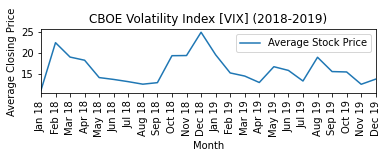

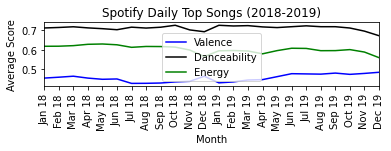

In [36]:
# Stock All
plt.subplot(3, 1, 1)
x_axis = np.arange(1,25)
plt.plot(x_axis, stock_mean_clean_1['Mean Closing Price'],label="Average Stock Price")

plt.legend()

months = ['Jan 18', 'Feb 18', 'Mar 18', 'Apr 18', 'May 18', 'Jun 18', 'Jul 18', 'Aug 18', 'Sep 18', 'Oct 18',
          'Nov 18', 'Dec 18', 'Jan 19', 'Feb 19', 'Mar 19', 'Apr 19', 'May 19', 'Jun 19', 'Jul 19', 'Aug 19',
          'Sep 19', 'Oct 19', 'Nov 19', 'Dec 19']
plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("CBOE Volatility Index [VIX] (2018-2019)")
plt.show()

# Music All
plt.subplot(3, 1, 2)
# plt.plot(x_axis, df_music_avg_scores_3['tempo'],color="red",label="Tempo")
plt.plot(x_axis, spotify_mean_3['valence'],color="blue",label="Valence")
# plt.plot(x_axis, df_music_avg_scores_3['key'],color="orange",label="Key")
plt.plot(x_axis, spotify_mean_3['danceability'],color="black",label="Danceability")
plt.plot(x_axis, spotify_mean_3['energy'],color="green",label="Energy")

plt.legend()

plt.xlim(1, len(months))
plt.xticks(x_axis, months, rotation="vertical")

plt.xlabel("Month")
plt.ylabel("Average Score")
plt.title("Spotify Daily Top Songs (2018-2019)")
plt.show()

In [37]:
# generating the final stock dataframe 
final_stock_df = stock_mean_clean_1[['Month','Year','Mean Closing Price']]
final_stock_df

,Month,Year,Mean Closing Price
0,1,2018,11.062381
1,2,2018,22.464737
2,3,2018,19.023810
3,4,2018,18.267619
4,5,2018,14.124545
5,6,2018,13.678095
6,7,2018,13.147619
7,8,2018,12.546957
8,9,2018,12.910526
9,10,2018,19.352174


In [38]:
df1 = vix_stock_data_clean
df2 = spotify_data_final.loc[(spotify_data_final['Year']==2018)|(spotify_data_final['Year']==2019), :]
df1_final = df1.sort_values(by=['Month', 'Day', 'Year'], ascending=[True, True, True])
df2_final = df2.sort_values(by=['Month', 'Day', 'Year'], ascending=[True, True, True])
df2_final.reset_index (drop=True)

,title,Month,Day,Year,tempo,valence,key,danceability,energy
0,rockstar,1,1,2018,159.772,0.1190,5.0,0.577,0.522
1,No Limit,1,1,2018,175.957,0.4050,1.0,0.838,0.771
2,Gucci Gang,1,1,2018,119.889,0.6990,5.0,0.936,0.523
3,Bartier Cardi,1,1,2018,138.043,0.0986,8.0,0.909,0.546
4,Havana,1,1,2018,104.992,0.4180,7.0,0.768,0.517
...,...,...,...,...,...,...,...,...,...
145995,No Role Modelz,12,31,2019,100.450,0.4630,10.0,0.692,0.521
145996,Lover,12,31,2019,68.534,0.4530,7.0,0.359,0.543
145997,all the good girls go to hell,12,31,2019,185.044,0.5690,8.0,0.726,0.444
145998,LOYAL,12,31,2019,104.952,0.2030,0.0,0.866,0.530


In [39]:
# Lagging the spotify dataframe by 3
df2_filtered = df2[(df2['Month'] == 1) & (df2['Year'] == 2018) & (df2['Day'] < 4)]
df2_filtered

,title,Month,Day,Year,tempo,valence,key,danceability,energy
207400,rockstar,1,3,2018,159.772,0.1190,5.0,0.577,0.522
207401,No Limit,1,3,2018,175.957,0.4050,1.0,0.838,0.771
207402,Bartier Cardi,1,3,2018,138.043,0.0986,8.0,0.909,0.546
207403,I Fall Apart,1,3,2018,143.950,0.2910,8.0,0.556,0.538
207404,Ric Flair Drip,1,3,2018,100.007,0.3330,9.0,0.880,0.428
...,...,...,...,...,...,...,...,...,...
207995,Never Enough,1,1,2018,86.777,0.2270,8.0,0.277,0.394
207996,DNA,1,1,2018,129.819,0.6870,1.0,0.598,0.775
207997,A Million Dreams,1,1,2018,54.747,0.0998,7.0,0.265,0.312
207998,Bring It Back,1,1,2018,152.040,0.2000,6.0,0.880,0.316


In [40]:
df1_final = df1.assign(Day = df1['Day'] - 3)
df1_final

,Month,Day,Year,Close
0,1,-1,2018,9.77
1,1,0,2018,9.15
2,1,1,2018,9.22
3,1,2,2018,9.22
4,1,5,2018,9.52
...,...,...,...,...
497,12,20,2019,12.61
498,12,21,2019,12.67
499,12,23,2019,12.65
500,12,24,2019,13.43


In [41]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 501
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   502 non-null    int64  
 1   Day     502 non-null    int64  
 2   Year    502 non-null    int64  
 3   Close   502 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 19.6 KB


In [42]:
# merge the two dataframes on the 'Day', 'Month', and 'Year'
df_merge = pd.merge(df2_final, df1_final, on=['Day', 'Month', 'Year'])

# display the joined dataframe
print("Lagged Dataframe:")
df_merge

Lagged Dataframe:


,title,Month,Day,Year,tempo,valence,key,danceability,energy,Close
0,rockstar,1,1,2018,159.772,0.1190,5.0,0.577,0.522,9.22
1,No Limit,1,1,2018,175.957,0.4050,1.0,0.838,0.771,9.22
2,Gucci Gang,1,1,2018,119.889,0.6990,5.0,0.936,0.523,9.22
3,Bartier Cardi,1,1,2018,138.043,0.0986,8.0,0.909,0.546,9.22
4,Havana,1,1,2018,104.992,0.4180,7.0,0.768,0.517,9.22
...,...,...,...,...,...,...,...,...,...,...
91195,my boy,12,28,2018,89.936,0.3240,11.0,0.692,0.394,25.42
91196,PICK IT UP,12,28,2018,135.995,0.2870,1.0,0.921,0.467,25.42
91197,Bounce Out With That,12,28,2018,94.932,0.3810,8.0,0.864,0.664,25.42
91198,Mona Lisa,12,28,2018,122.080,0.4890,2.0,0.856,0.694,25.42


In [43]:
# generating the man for the merged dataframe
df_merge_mean = df_merge.groupby(['Month','Year']).mean().reset_index()
df_merge_mean

,Month,Year,Day,tempo,valence,key,danceability,energy,Close
0,1,2018,14.842105,121.587953,0.451371,5.525382,0.713667,0.617560,11.231053
1,1,2019,14.947368,122.541786,0.428281,5.425833,0.727665,0.595210,19.071052
2,2,2018,13.000000,120.701516,0.457079,5.595509,0.716879,0.618776,23.297059
3,2,2019,12.722222,123.101201,0.432366,5.456257,0.725360,0.595223,15.184444
4,3,2018,13.842105,119.802367,0.460804,5.529281,0.721068,0.620382,18.812632
5,3,2019,13.500000,122.297599,0.440922,5.550365,0.724746,0.594829,14.531000
6,4,2018,13.578947,122.512557,0.453865,5.623585,0.714123,0.628407,17.836842
7,4,2019,13.888889,119.920732,0.444388,5.448504,0.718850,0.579219,12.857222
8,5,2018,14.578947,123.612113,0.446314,5.581554,0.710224,0.629508,13.862105
9,5,2019,15.052632,120.840037,0.460777,5.475699,0.715971,0.596044,17.146842


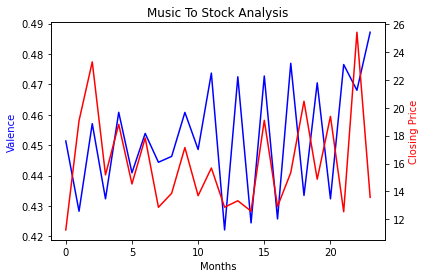

In [44]:
# create figure and axis object
fig, ax1 = plt.subplots()

# plot the 'Valence' Column on the primary y-axis
ax1.plot(df_merge_mean['valence'], color='blue')

# set the label for the primary y-axis
ax1.set_ylabel('Valence', color='blue')

# create a secondary axis object for the second dataset
ax2 = ax1.twinx()

# plot the 'Close' Column on the secondary y-axis
ax2.plot(df_merge_mean['Close'], color='red')

# set the label for the secondary y-axis
ax2.set_ylabel('Closing Price', color='red')

# set the x-axis label and title
ax1.set_xlabel('Months')
ax1.set_title('Music To Stock Analysis')

# display the graph
plt.show()

## CONCLUSION 
**Some Degree of Positive Correlation**

As the **Valence** of the music went up there was some noticeable upward shift following a 3-day lag in the **Closing Price** of the Vix Stock within the period. 

Our main results is **postive** and significant relation between Music Sentiment (Valency) and contemporary market returns.

This also provides evidence that a proxy for the actual sentiment of people is significantly correlated with stock returns based in our assumption that the music people listen to is reflection of their current mood. 